# Previsão de Cancelamentos de Reservas em Hotéis

### Informações do Aluno

- **Curso**: Programa de Pós-Graduação em Computação Aplicada - UnB
- **Disciplina**: Análise Estatística de Dados e Informação
- **Data**: 09 de fevereiro de 2025
- **Autor**: Ebenezer Andrade da Silva
- **Matricula**: 241134715
- **Prova Final - Questão 02**

### Fonte dos Dados
Os dados utilizados neste notebook são públicos e estão disponíveis no Kaggle. Você pode acessá-los através do link abaixo:

[Hotel booking demand - Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

Este conjunto de dados contém informações de reservas para um hotel urbano e um resort, incluindo dados como a data da reserva, duração da estadia, número de adultos, crianças e/ou bebês, além da quantidade de vagas de estacionamento disponíveis, entre outros detalhes.

O objetivo deste notebook é prever se os indivı́duos irão cancelar suas reservas.

### Estrutura do Notebook
1. **Importação das Bibliotecas**
2. **Carregamento dos Dados**
3. **Análise Exploratória de Dados (EDA)**
4. **Criação do Modelo**
5. **Ajuste do Modelo**
6. **Justificativa da Regressão Logística**

### Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Define o estilo dos gráficos do Seaborn
sns.set_style('whitegrid')

### Carregamento dos Dados

In [3]:
data = pd.read_csv('hotel_bookings.csv')

### Análise Exploratória de Dados (EDA)

In [4]:
data.shape

(119390, 32)

In [5]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Quantidade de valores ausentes por coluna:\n", missing_values)

Quantidade de valores ausentes por coluna:
 company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_canc

In [9]:
data["children"] = data["children"].fillna(0)
data["country"] = data["country"].fillna("Unknown")
data["agent"] = data["agent"].fillna(0)
data["company"] = data["company"].fillna(0)

In [10]:
# Converter a coluna reservation_status_date para formato de data
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

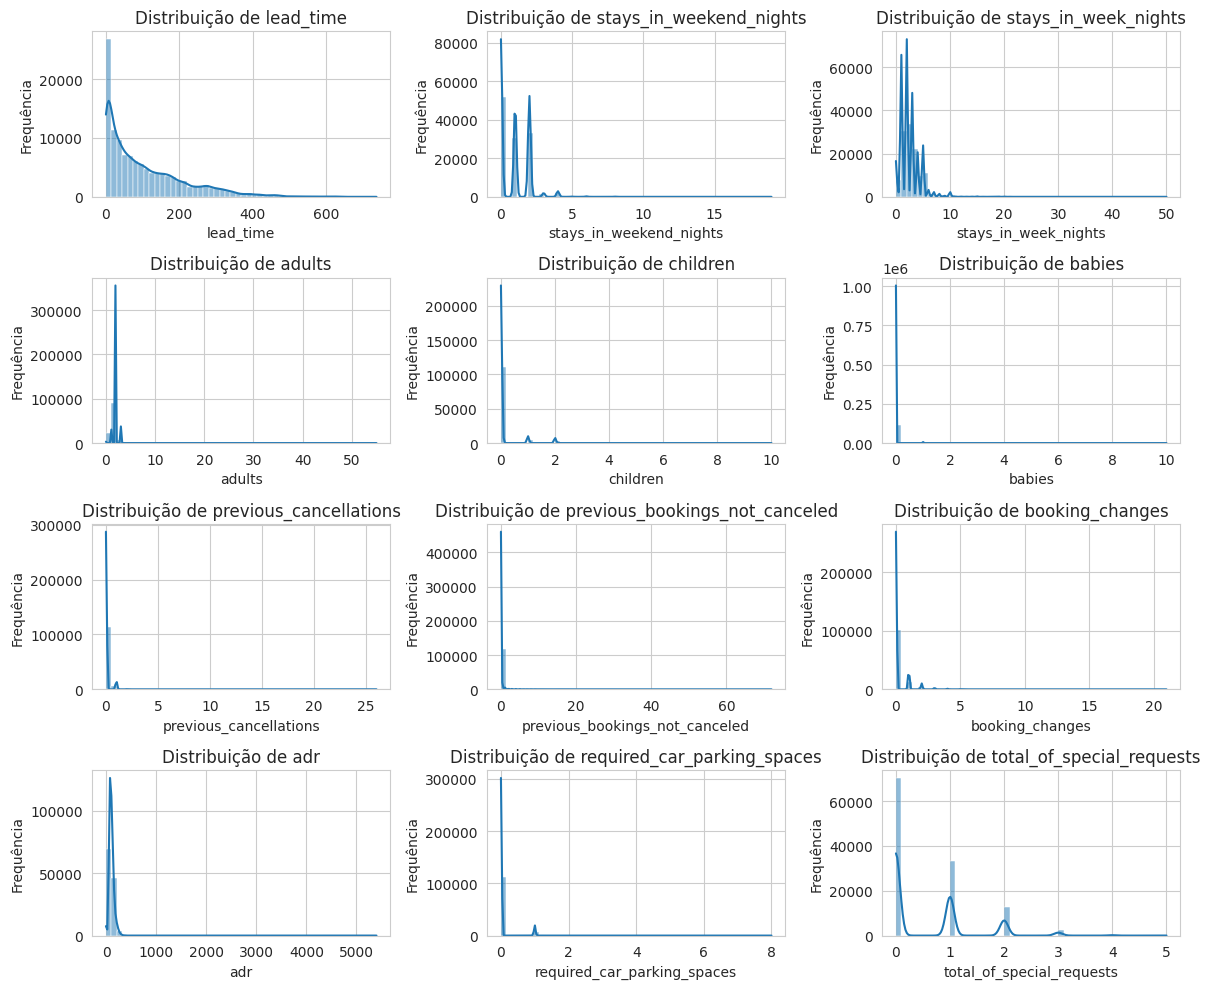

In [11]:
num_features = [
    "lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults",
    "children", "babies", "previous_cancellations", "previous_bookings_not_canceled",
    "booking_changes", "adr", "required_car_parking_spaces", "total_of_special_requests"
]

plt.figure(figsize=(12, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

As distribuições mostram que algumas variáveis, como `lead_time` e `adr`, possuem uma cauda longa à direita, indicando valores extremos e possível presença de outliers. A maioria das variáveis, como `previous_cancellations`, `booking_changes` e `required_car_parking_spaces`, apresenta uma distribuição altamente assimétrica, com concentração na faixa mais baixa e poucos valores altos. Variáveis como `adults` e `children` mostram picos distintos, sugerindo que a maioria das reservas é feita para 1 ou 2 adultos, enquanto a presença de bebês é rara.

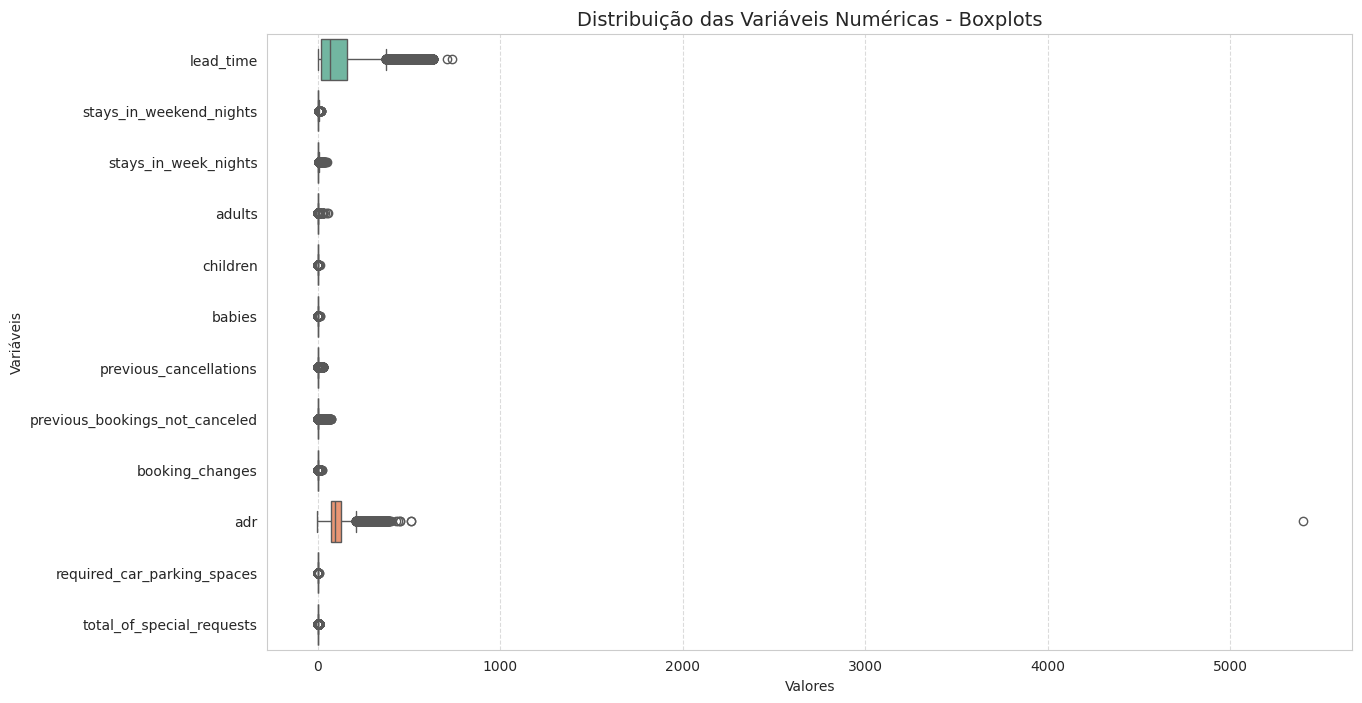

In [12]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[num_features], orient='h', palette='Set2')

plt.title("Distribuição das Variáveis Numéricas - Boxplots", fontsize=14)
plt.xlabel("Valores")
plt.ylabel("Variáveis")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

É possível observar que a maioria das variáveis apresenta outliers, especialmente `lead_time`, `adr`, `previous_cancellations`, e `booking_changes`, que possuem valores extremos distantes da mediana. A variável `adr` tem um valor outlier superior a 5000, sugerindo preços incomuns ou erros de dados. Além disso, variáveis como `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, e `babies` apresentam distribuições concentradas perto de zero, indicando que a maioria das reservas envolve um número pequeno de hóspedes e estadias curtas.

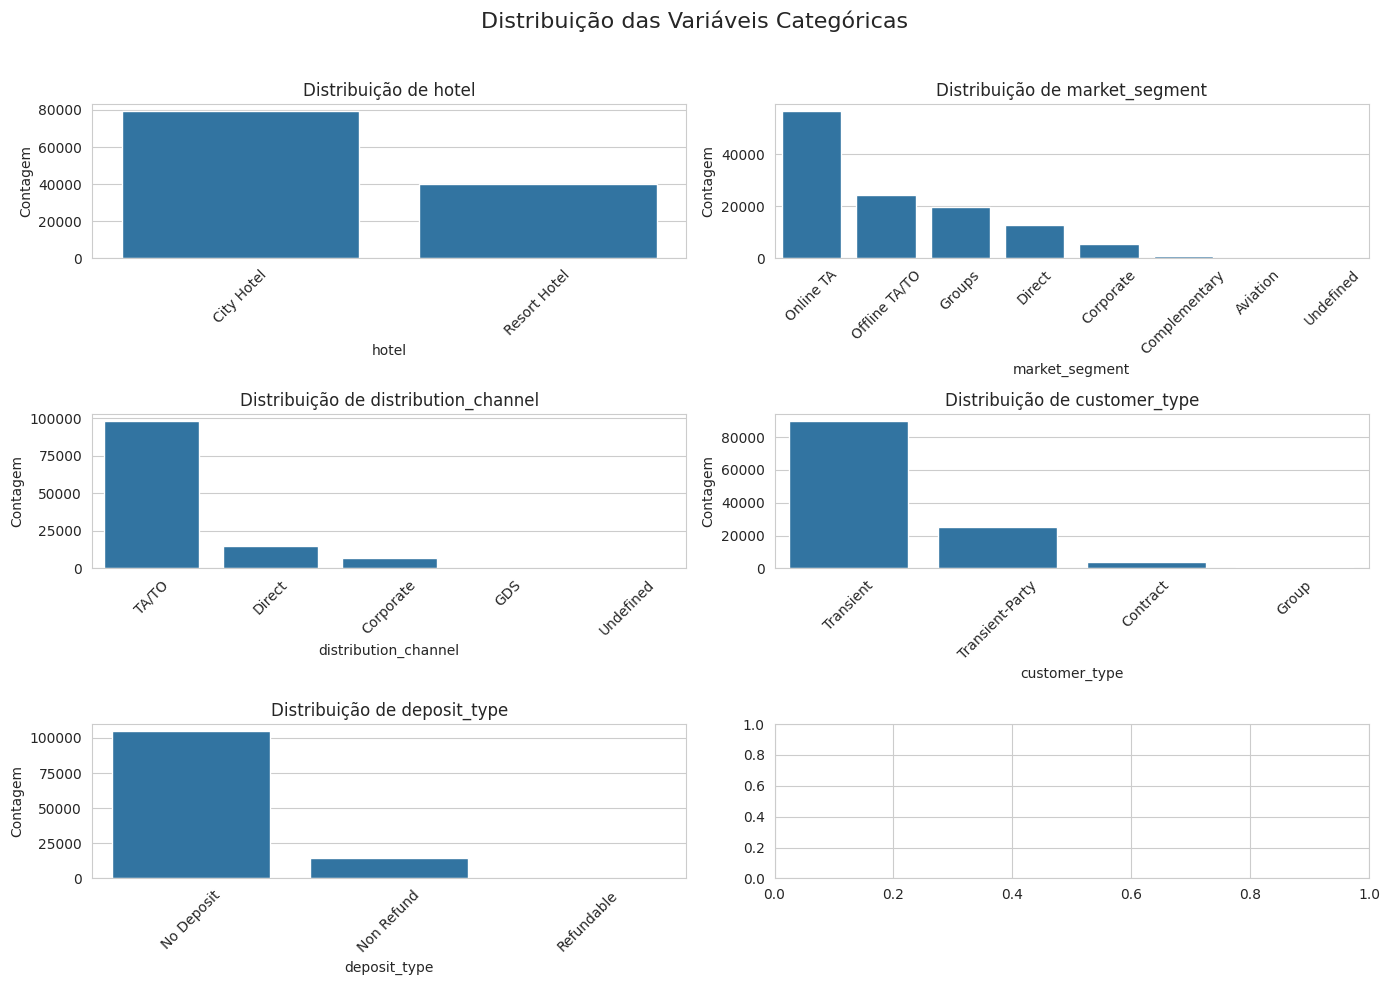

In [13]:
cat_features = ["hotel", "market_segment", "distribution_channel", "customer_type", "deposit_type"]

num_rows = 3 
num_cols = 2 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))
fig.suptitle("Distribuição das Variáveis Categóricas", fontsize=16)

# Ajustar espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(cat_features):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=data[feature], order=data[feature].value_counts().index, ax=axes[row, col])
    axes[row, col].set_title(f"Distribuição de {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Contagem")
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A maioria das reservas foi realizada para `City Hotels`, principalmente por meio de agências de viagem online (`Online TA`) e o canal de distribuição `TA/TO (Travel Agents/Tour Operators)`, enquanto reservas diretas e corporativas têm menor participação. O perfil predominante dos clientes é `Transient (hóspedes individuais sem contrato fixo)`, seguido por `Transient-Party (grupos sem contrato)`. Além disso, a maioria das reservas foi feita na modalidade `No Deposit`, sugerindo que a maioria dos clientes prefere não pagar antecipadamente, o que pode influenciar na taxa de cancelamento.

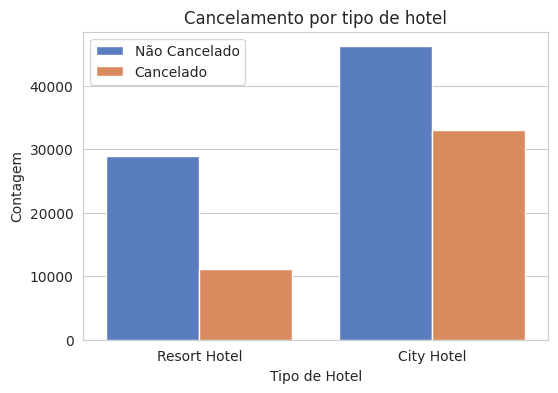

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='hotel', hue='is_canceled', palette='muted')
plt.title('Cancelamento por tipo de hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Contagem')
plt.legend(['Não Cancelado', 'Cancelado'])
plt.show()


Observa-se que, para ambos os tipos de hotel, há mais reservas não canceladas (barras azuis) do que canceladas (barras laranjas). No entanto, os `City Hotels` apresentam um número significativamente maior de cancelamentos em comparação aos `Resort Hotels`. Isso pode indicar que reservas feitas para `City Hotels` estão mais sujeitas a cancelamentos, possivelmente devido à natureza das estadias (viagens a trabalho ou negócios, onde mudanças de plano são mais comuns), enquanto `Resort Hotels`, associados a turismo e lazer, podem ter reservas mais estáveis.

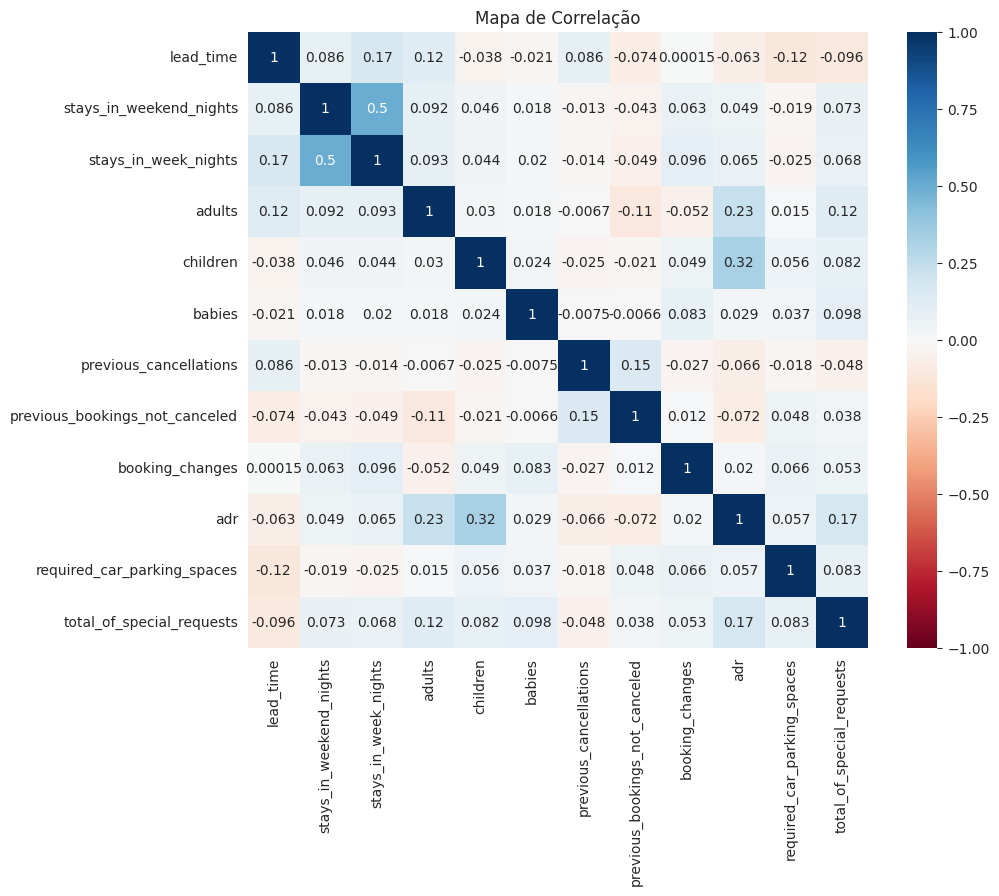

In [15]:
corr_matrix = data[num_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Mapa de Correlação')
plt.show()

O heatmap revela que não há correlações extremamente altas entre as variáveis, indicando que cada uma pode fornecer informações distintas ao modelo. Há uma correlação moderada entre `stays_in_weekend_nights` e `stays_in_week_nights (0.50)`, sugerindo que hóspedes que ficam mais durante a semana também tendem a prolongar a estadia nos finais de semana. A variável `adr (Preço Médio Diário)` tem correlação positiva com `adults (0.23)` e `children (0.32)`, sugerindo que tarifas mais altas estão associadas a reservas com mais hóspedes. Reservas com maior antecedência `(lead_time)` apresentam leve relação com cancelamentos anteriores (0.086), enquanto clientes que fazem pedidos especiais tendem a reservar mais próximo da data de hospedagem (-0.096). Além disso, `booking_changes` não apresenta forte correlação com outras variáveis, indicando que mudanças nas reservas ocorrem de forma independente.

### Criação do Modelo

##### Pré-processamento dos dados

###### Remoçãode outliers para verificar a melhoria no modelo

In [16]:
data_cleaned = data.copy()

In [17]:
# Função para remoção de outliers usando o método IQR (Intervalo Interquartil)
def remove_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.01)
        q3 = data[col].quantile(0.99)
        iqr = q3 - q1 
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [18]:
data_cleaned = remove_outliers(data_cleaned, num_features)

print("Estatísticas antes do tratamento de outliers:")
print(data[num_features].describe())

print("\n\n\n Estatísticas após o tratamento de outliers:")
print(data_cleaned[num_features].describe())

Estatísticas antes do tratamento de outliers:
           lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  119390.000000            119390.000000         119390.000000   
mean      104.011416                 0.927599              2.500302   
std       106.863097                 0.998613              1.908286   
min         0.000000                 0.000000              0.000000   
25%        18.000000                 0.000000              1.000000   
50%        69.000000                 1.000000              2.000000   
75%       160.000000                 2.000000              3.000000   
max       737.000000                19.000000             50.000000   

              adults       children         babies  previous_cancellations  \
count  119390.000000  119390.000000  119390.000000           119390.000000   
mean        1.856403       0.103886       0.007949                0.087118   
std         0.579261       0.398555       0.097436                0.844336   
mi

In [19]:
features = [
    "hotel", "lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month",
    "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children",
    "meal", "market_segment", "distribution_channel", "is_repeated_guest",
    "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type",
    "booking_changes", "deposit_type", "customer_type", "adr", "required_car_parking_spaces",
    "total_of_special_requests"
]
X = data[features]
y = data['is_canceled']

In [20]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [21]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

##### Treinar o modelo de Regressão logistica

In [22]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('classifier', LogisticRegression(max_iter=500))])

In [25]:
y_pred = model.predict(X_test)

##### Avaliar o modelo

In [26]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [27]:
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix)
print("\nRelatório de Classificação:")
print(class_report)

Acurácia: 0.8097
Precisão: 0.8418
Recall: 0.5986
F1-score: 0.6997

Matriz de Confusão:
[[14038   995]
 [ 3550  5295]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     15033
           1       0.84      0.60      0.70      8845

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.78     23878
weighted avg       0.81      0.81      0.80     23878



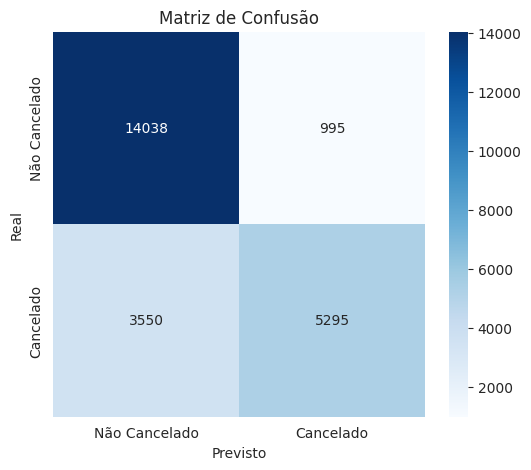

In [28]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Cancelado", "Cancelado"], yticklabels=["Não Cancelado", "Cancelado"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

##### Melhorar o modelo

Aqui apliquei uma  melhora na detecção de cancelamentos ajustando o threshold de decisão. Ao reduzir o limiar para 0.4, o modelo prevê mais cancelamentos, aumentando o recall (capacidade de detectar reservas realmente canceladas), mas podendo reduzir a precisão (mais falsos positivos). Essa abordagem é útil para minimizar prejuízos por cancelamentos inesperados.

In [29]:
# Prever probabilidades em vez de previsões diretas
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe 1 (cancelado)

# Ajuste de  threshold
threshold = 0.4
y_pred_adjusted = (y_probs >= threshold).astype(int)

##### Avaliar o modelo com o threshold ajustado

In [30]:
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)

In [31]:
print(f"📌 Acurácia: {accuracy:.4f}")
print(f"📌 Precisão: {precision:.4f}")
print(f"📌 Recall: {recall:.4f}  🔺 Melhorado!")
print(f"📌 F1-score: {f1:.4f}")


📌 Acurácia: 0.7941
📌 Precisão: 0.7355
📌 Recall: 0.6934  🔺 Melhorado!
📌 F1-score: 0.7138


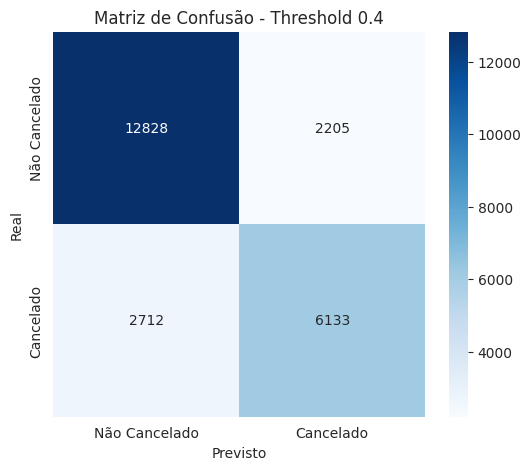

In [32]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Cancelado", "Cancelado"], yticklabels=["Não Cancelado", "Cancelado"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title(f"Matriz de Confusão - Threshold {threshold}")
plt.show()

### Justificativa da Regressão Logística  

A Regressão Logística foi escolhida porque o problema envolve classificação binária (`is_canceled`: 0 ou 1).  
Ela prevê a probabilidade de cancelamento, garantindo valores entre **0 e 1**, ao contrário da Regressão Linear, que pode gerar valores que não se relacionam com o contexto do problema.

####  Comparação Direta  
| **Critério** | **Regressão Logística** | **Regressão Linear**  |
|-------------|----------------------|----------------------|
| **Tipo de Problema** | Classificação Binária | Regressão Contínua |
| **Saída do Modelo** | Probabilidade (0 a 1) | Qualquer número real |


####  Resultados do Modelo Melhorado  
- **Acurácia: 79.38%** → O modelo classifica bem as reservas, mantendo um bom equilíbrio geral.  
- **Precisão: 73.50%** → Evita falsos positivos, garantindo previsões mais confiáveis.  
- **Recall: 69.34%** → 🔺 **Melhorado!** Agora detecta mais cancelamentos reais.  
- **F1-score: 71.36%** → Mostra um bom equilíbrio entre precisão e recall.  

####  Conclusão  
A **Regressão Logística é ideal** porque **lida bem com classificação**, fornece **probabilidades interpretáveis** e se adapta melhor ao problema do que a **Regressão Linear**. Com o **ajuste do threshold (0.4)**, consegui **aumentar o recall**, tornando o modelo mais eficaz na **identificação de cancelamentos reais**, reduzindo possíveis prejuízos e melhorando a tomada de decisão do negócio.  
